In [3]:
"""
色々準備
"""
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute
from qiskit.circuit import Gate
from qiskit.circuit.library import CXGate,C3XGate,C3SXGate,C4XGate

# import basic plot tools
from qiskit.visualization import plot_histogram

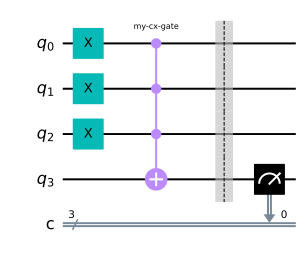

In [4]:
my_cx_gate = C3XGate(label="my-cx-gate")
# my_cx_gate = C3SXGate(label="my-cx-gate")
# my_cx_gate = C4XGate(label="my-cx-gate")

# my_cx_gate.control(3, ctrl_state="111")

qc_hoge = QuantumCircuit(4, 3)
qc_hoge.x(0)
qc_hoge.x(1)
qc_hoge.x(2)
qc_hoge.append(my_cx_gate, (0,1,2,3))
# qc_hoge.rcccx(0,1,2,3)
qc_hoge.barrier()
qc_hoge.measure((3), (0))

qc_hoge.draw()

# backend = Aer.get_backend("qasm_simulator")
# shots = 1024
# results = execute(qc_hoge, backend=backend, shots=shots).result()
# count = results.get_counts()
# plot_histogram(count)

In [5]:
"""
ブルーバックス本のドイチュ・ジョサを実装する
"""
q_adr = 3  # アドレス量子ビット
q_reg = 1  # レジスタ量子ビット
cbits = 3

def dj_circuit(blackbox):
    dj_qc = QuantumCircuit(q_adr+q_reg, cbits)

    """ステップA
    アドレスビットにアダマールゲートを適用
    """
    for i in range(q_adr):
        dj_qc.h(i)
    dj_qc.barrier()

    """ステップB
    量子ブラックボックス回路を作成
    量子ブラックボックス回路は、
    * アドレスビットに対応するビット値が、
    - 0ならば、レジスタビットはそのまま
    - 1ならば、レジスタビットの値を反転する
    これにより、ブラックボックスのビット列を、重ね合わせ状態のレジスタビットに一気に読み出す
    """
    dj_qc.append(blackbox, qargs=range(q_adr+q_reg))
    dj_qc.barrier()

    """ステップC
    制御位相シフトゲートで、レジスタビットが|1>の項の位相を反転（負にする） 
    """
    dj_qc.z(q_adr)
    dj_qc.barrier()

    """ステップD
    再度、量子ブラックボックス回路を適用
    これにより、レジスタビットは初期状態に戻る
    """
    dj_qc.append(blackbox, qargs=range(q_adr+q_reg))
    dj_qc.barrier()

    """ステップE
    再度、アドレスビットにアダマールゲートを適用
    """
    for i in range(q_adr):
        dj_qc.h(i)
    dj_qc.barrier()

    """測定
    アドレスビットを測定する。
    * すべて|0>なら、均一なビット列
    * それ以外なら、等分なビット列
    """
    for i in range(q_adr):
        dj_qc.measure(i, i)
    
    return dj_qc

In [6]:
def cx_000_gate():
    # |000>のときだけxを作用させる
    qc = QuantumCircuit(q_adr+q_reg, name="cx_000_gate")
    qc.x(0), qc.x(1), qc.x(2)
    # qc.rcccx(0,1,2,3)
    c3x_gate = C3XGate(label="C3XGate")
    qc.append(c3x_gate, (0,1,2,3))
    qc.x(0), qc.x(1), qc.x(2)
    return qc.to_gate()

In [7]:
def cx_001_gate():
    # |001>のときだけxを作用させる
    qc = QuantumCircuit(q_adr+q_reg, name="cx_001_gate")
    qc.x(1), qc.x(2)
    # qc.rcccx(0,1,2,3)
    c3x_gate = C3XGate(label="C3XGate")
    qc.append(c3x_gate, (0,1,2,3))
    qc.x(1), qc.x(2)
    return qc.to_gate()

In [8]:
def cx_010_gate():
    # |010>のときだけxを作用させる
    qc = QuantumCircuit(q_adr+q_reg, name="cx_010_gate")
    qc.x(0), qc.x(2)
    # qc.rcccx(0,1,2,3)
    c3x_gate = C3XGate(label="C3XGate")
    qc.append(c3x_gate, (0,1,2,3))
    qc.x(0), qc.x(2)
    return qc.to_gate()

In [9]:
def cx_011_gate():
    # |011>のときだけxを作用させる
    qc = QuantumCircuit(q_adr+q_reg, name="cx_011_gate")
    qc.x(2)
    # qc.rcccx(0,1,2,3)
    c3x_gate = C3XGate(label="C3XGate")
    qc.append(c3x_gate, (0,1,2,3))
    qc.x(2)
    return qc.to_gate()

In [10]:
def cx_100_gate():
    # |100>のときだけxを作用させる
    qc = QuantumCircuit(q_adr+q_reg, name="cx_100_gate")
    qc.x(0), qc.x(1)
    # qc.rcccx(0,1,2,3)
    c3x_gate = C3XGate(label="C3XGate")
    qc.append(c3x_gate, (0,1,2,3))
    qc.x(0), qc.x(1)
    return qc.to_gate()

In [11]:
def cx_101_gate():
    # |101>のときだけxを作用させる
    qc = QuantumCircuit(q_adr+q_reg, name="cx_101_gate")
    qc.x(1)
    # qc.rcccx(0,1,2,3)
    c3x_gate = C3XGate(label="C3XGate")
    qc.append(c3x_gate, (0,1,2,3))
    qc.x(1)
    return qc.to_gate()

In [12]:
def cx_110_gate():
    # |110>のときだけxを作用させる
    qc = QuantumCircuit(q_adr+q_reg, name="cx_110_gate")
    qc.x(0)
    # qc.rcccx(0,1,2,3)
    c3x_gate = C3XGate(label="C3XGate")
    qc.append(c3x_gate, (0,1,2,3))
    qc.x(0)
    return qc.to_gate()

In [13]:
def cx_111_gate():
    # |111>のときだけxを作用させる
    qc = QuantumCircuit(q_adr+q_reg, name="cx_111_gate")
    # qc.rcccx(0,1,2,3)
    c3x_gate = C3XGate(label="C3XGate")
    qc.append(c3x_gate, (0,1,2,3))
    return qc.to_gate()

In [14]:
def make_blackbox_01101010():
    """ブラックボックス回路を作成する
    """
    oracle = QuantumCircuit(q_adr+q_reg, name="blackbox")
    # ビット列のビットが立っているところ
    oracle.append(cx_001_gate(), range(q_adr+q_reg))  # 1
    oracle.append(cx_011_gate(), range(q_adr+q_reg))  # 3
    oracle.append(cx_101_gate(), range(q_adr+q_reg))  # 5
    oracle.append(cx_110_gate(), range(q_adr+q_reg))  # 6
    return oracle

In [15]:
def make_blackbox_00000000():
    """ブラックボックス回路を作成する
    """
    oracle = QuantumCircuit(q_adr+q_reg, name="blackbox")
    # ビット列のビットが立っているところはない
    return oracle

In [16]:
def make_blackbox_11111111():
    """ブラックボックス回路を作成する
    """
    oracle = QuantumCircuit(q_adr+q_reg, name="blackbox")
    # ビット列のビットが立っているところは全部なので、q3を反転するだけでOK
    oracle.x(3)
    return oracle

In [17]:
def make_blackbox_10110100():
    """ブラックボックス回路を作成する
    """
    oracle = QuantumCircuit(q_adr+q_reg, name="blackbox")
    # ビット列のビットが立っているところ
    oracle.append(cx_010_gate(), range(q_adr+q_reg))  # 2
    oracle.append(cx_100_gate(), range(q_adr+q_reg))  # 4
    oracle.append(cx_101_gate(), range(q_adr+q_reg))  # 5
    oracle.append(cx_111_gate(), range(q_adr+q_reg))  # 7
    return oracle

In [18]:
def make_blackbox_00101101():
    """ブラックボックス回路を作成する
    """
    oracle = QuantumCircuit(q_adr+q_reg, name="blackbox")
    # ビット列のビットが立っているところ
    oracle.append(cx_000_gate(), range(q_adr+q_reg))  # 0
    oracle.append(cx_010_gate(), range(q_adr+q_reg))  # 2
    oracle.append(cx_011_gate(), range(q_adr+q_reg))  # 3
    oracle.append(cx_101_gate(), range(q_adr+q_reg))  # 5
    return oracle

In [19]:
def make_blackbox_00001111():
    """ブラックボックス回路を作成する
    """
    oracle = QuantumCircuit(q_adr+q_reg, name="blackbox")
    # ビット列のビットが立っているところ
    oracle.append(cx_000_gate(), range(q_adr+q_reg))  # 0
    oracle.append(cx_001_gate(), range(q_adr+q_reg))  # 1
    oracle.append(cx_010_gate(), range(q_adr+q_reg))  # 2
    oracle.append(cx_011_gate(), range(q_adr+q_reg))  # 3
    return oracle

In [20]:
def make_blackbox_11110000():
    """ブラックボックス回路を作成する
    """
    oracle = QuantumCircuit(q_adr+q_reg, name="blackbox")
    # ビット列のビットが立っているところ
    oracle.append(cx_100_gate(), range(q_adr+q_reg))  # 4
    oracle.append(cx_101_gate(), range(q_adr+q_reg))  # 5
    oracle.append(cx_110_gate(), range(q_adr+q_reg))  # 6
    oracle.append(cx_111_gate(), range(q_adr+q_reg))  # 7
    return oracle

In [21]:
def make_blackbox_01010101():
    """ブラックボックス回路を作成する
    """
    oracle = QuantumCircuit(q_adr+q_reg, name="blackbox")
    # ビット列のビットが立っているところ
    oracle.append(cx_000_gate(), range(q_adr+q_reg))  # 0
    oracle.append(cx_010_gate(), range(q_adr+q_reg))  # 2
    oracle.append(cx_100_gate(), range(q_adr+q_reg))  # 4
    oracle.append(cx_110_gate(), range(q_adr+q_reg))  # 6
    return oracle

In [22]:
def make_blackbox_10101010():
    """ブラックボックス回路を作成する
    """
    oracle = QuantumCircuit(q_adr+q_reg, name="blackbox")
    # ビット列のビットが立っているところ
    oracle.append(cx_001_gate(), range(q_adr+q_reg))  # 1
    oracle.append(cx_011_gate(), range(q_adr+q_reg))  # 3
    oracle.append(cx_101_gate(), range(q_adr+q_reg))  # 5
    oracle.append(cx_111_gate(), range(q_adr+q_reg))  # 7
    return oracle

In [23]:
def make_blackbox_00111100():
    """ブラックボックス回路を作成する
    """
    oracle = QuantumCircuit(q_adr+q_reg, name="blackbox")
    # ビット列のビットが立っているところ
    oracle.append(cx_010_gate(), range(q_adr+q_reg))  # 2
    oracle.append(cx_011_gate(), range(q_adr+q_reg))  # 3
    oracle.append(cx_100_gate(), range(q_adr+q_reg))  # 4
    oracle.append(cx_101_gate(), range(q_adr+q_reg))  # 5
    return oracle

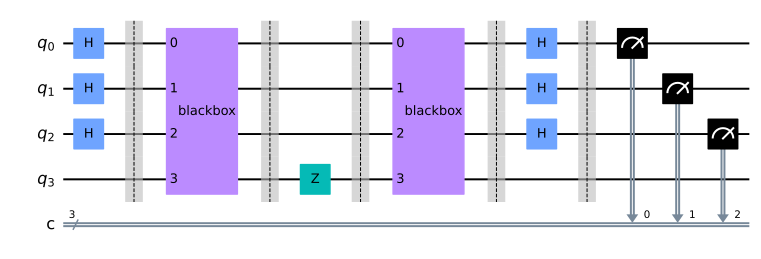

In [24]:
blackbox = make_blackbox_01101010()
dj_qc = dj_circuit(blackbox)
dj_qc.draw()

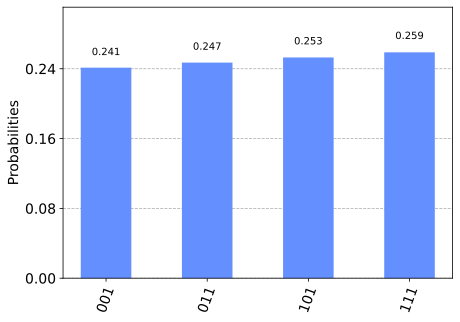

In [25]:
"""01101010実行
100%の確率で000でなければ、等分なビット列といえる
"""
backend = Aer.get_backend("qasm_simulator")
shots = 1024
results = execute(dj_qc, backend=backend, shots=shots).result()
count = results.get_counts()
plot_histogram(count)

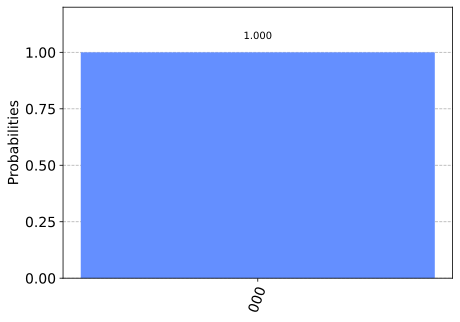

In [26]:
"""00000000実行
100%の確率で000になれば、均一なビット列
"""
blackbox = make_blackbox_00000000()
dj_qc = dj_circuit(blackbox)
backend = Aer.get_backend("qasm_simulator")
shots = 1024
results = execute(dj_qc, backend=backend, shots=shots).result()
count = results.get_counts()
plot_histogram(count)

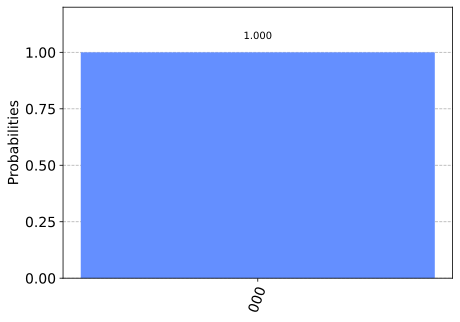

In [27]:
"""11111111実行
100%の確率で000になれば、均一なビット列
"""
blackbox = make_blackbox_11111111()
dj_qc = dj_circuit(blackbox)
backend = Aer.get_backend("qasm_simulator")
shots = 1024
results = execute(dj_qc, backend=backend, shots=shots).result()
count = results.get_counts()
plot_histogram(count)

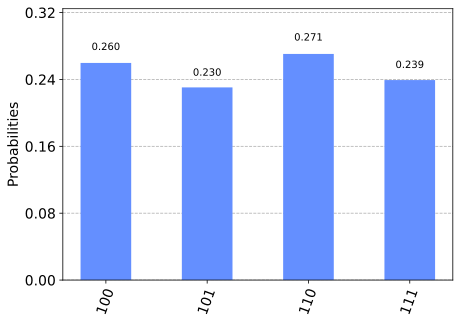

In [28]:
"""10110100実行
"""
blackbox = make_blackbox_10110100()
dj_qc = dj_circuit(blackbox)
backend = Aer.get_backend("qasm_simulator")
shots = 1024
results = execute(dj_qc, backend=backend, shots=shots).result()
count = results.get_counts()
plot_histogram(count)

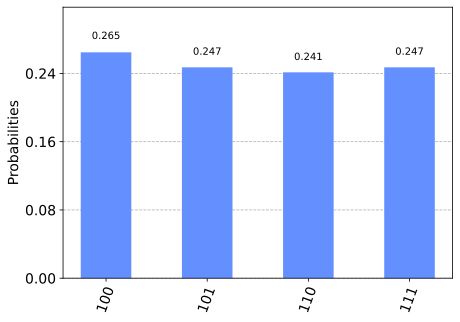

In [29]:
"""00101101実行
100%の確率で000にならなければ、等分なビット列
"""
blackbox = make_blackbox_00101101()
dj_qc = dj_circuit(blackbox)
backend = Aer.get_backend("qasm_simulator")
shots = 1024
results = execute(dj_qc, backend=backend, shots=shots).result()
count = results.get_counts()
plot_histogram(count)

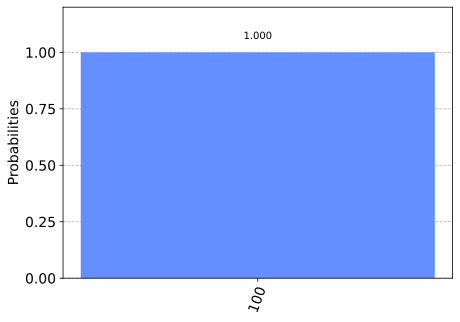

In [30]:
"""00001111実行
100%の確率で000にならなければ、等分なビット列
"""
blackbox = make_blackbox_00001111()
dj_qc = dj_circuit(blackbox)
backend = Aer.get_backend("qasm_simulator")
shots = 1024
results = execute(dj_qc, backend=backend, shots=shots).result()
count = results.get_counts()
plot_histogram(count)

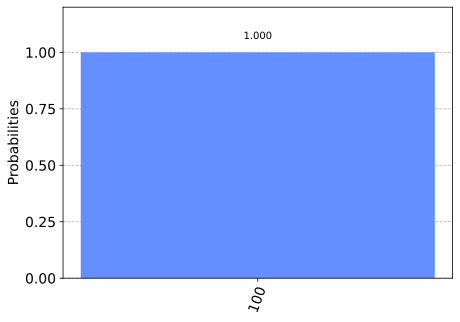

In [31]:
"""11110000実行
100%の確率で000にならなければ、等分なビット列
"""
blackbox = make_blackbox_11110000()
dj_qc = dj_circuit(blackbox)
backend = Aer.get_backend("qasm_simulator")
shots = 1024
results = execute(dj_qc, backend=backend, shots=shots).result()
count = results.get_counts()
plot_histogram(count)

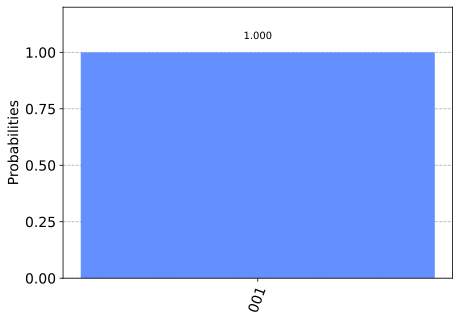

In [32]:
"""01010101実行
100%の確率で000にならなければ、等分なビット列
"""
blackbox = make_blackbox_01010101()
dj_qc = dj_circuit(blackbox)
backend = Aer.get_backend("qasm_simulator")
shots = 1024
results = execute(dj_qc, backend=backend, shots=shots).result()
count = results.get_counts()
plot_histogram(count)

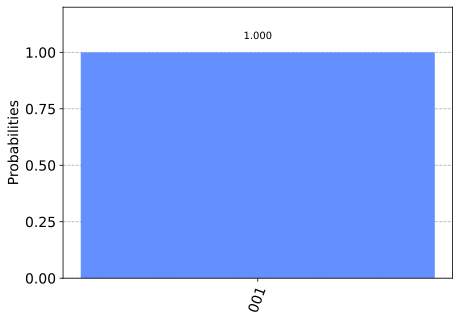

In [33]:
"""10101010実行
100%の確率で000にならなければ、等分なビット列
"""
blackbox = make_blackbox_10101010()
dj_qc = dj_circuit(blackbox)
backend = Aer.get_backend("qasm_simulator")
shots = 1024
results = execute(dj_qc, backend=backend, shots=shots).result()
count = results.get_counts()
plot_histogram(count)

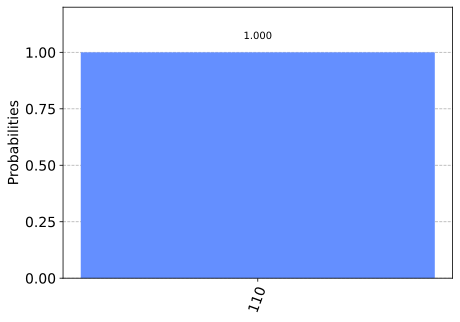

In [34]:
"""00111100実行
100%の確率で000にならなければ、等分なビット列
"""
blackbox = make_blackbox_00111100()
dj_qc = dj_circuit(blackbox)
backend = Aer.get_backend("qasm_simulator")
shots = 1024
results = execute(dj_qc, backend=backend, shots=shots).result()
count = results.get_counts()
plot_histogram(count)